In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import keras as K
from sklearn.metrics import classification_report,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Data import and preprocessing

In [4]:
data = pd.read_csv('Churn_Modelling.csv')

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Dropåing RowNumber, CustomerID and Surname since they do not carry predictive information

In [6]:
X = data.iloc[:,3:-1].values

In [7]:
y = data.iloc[:,-1].values

## One-hot-encoding

In [8]:
le_x1 = LabelEncoder()
le_x2 = LabelEncoder()

In [9]:
X[:,1] = le_x1.fit_transform(X[:,1])

In [10]:
X[:,2] = le_x2.fit_transform(X[:,2])

In [11]:
ohe = OneHotEncoder(categorical_features = [1])

In [12]:
X = ohe.fit_transform(X).toarray()

In [13]:
X.shape

(10000, 12)

## Train-test split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

## Standardizing the data

In [15]:
sc = StandardScaler()

In [16]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Models

## Logistic regression

In [17]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_pred = log_model.predict(X_test)

In [19]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.83      0.97      0.90       800
          1       0.64      0.21      0.32       200

avg / total       0.79      0.82      0.78      1000



In [20]:
print(confusion_matrix(y_test, y_pred))

[[776  24]
 [157  43]]


## Random forest

In [21]:
rfc_model = RandomForestClassifier(n_estimators = 100)
rfc_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [22]:
y_pred = rfc_model.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.87      0.95      0.91       800
          1       0.70      0.42      0.53       200

avg / total       0.83      0.85      0.83      1000



In [24]:
print(confusion_matrix(y_test, y_pred))

[[763  37]
 [115  85]]


## Neural network

Creating class weights to account for label imbalance

In [25]:
cw = {0:(1-(y_train[y_train == 0].size/y_train.size)),1:(1-(y_train[y_train == 1].size/y_train.size))}

In [26]:
model = K.models.Sequential()

In [27]:
model.add(K.layers.Dense(32,activation = 'relu', input_dim = 12))

In [28]:
model.add(K.layers.Dense(64,activation = 'relu'))

In [29]:
model.add(K.layers.Dense(1,activation = 'sigmoid'))

In [30]:
opt = K.optimizers.adam(lr=0.0001)

In [31]:
model.compile(optimizer=opt, loss= 'binary_crossentropy', metrics=['acc'])

In [32]:
history = model.fit(x=X_train, y=y_train,batch_size=128,epochs=100,validation_split=0.1,class_weight=cw)

Train on 8100 samples, validate on 900 samples
Epoch 1/100
8100/8100 [==============================] - 1s 119us/step - loss: 0.2287 - acc: 0.3814 - val_loss: 0.2254 - val_acc: 0.4422
Epoch 2/100
8100/8100 [==============================] - 0s 20us/step - loss: 0.2214 - acc: 0.4621 - val_loss: 0.2204 - val_acc: 0.4833
Epoch 3/100
8100/8100 [==============================] - 0s 19us/step - loss: 0.2157 - acc: 0.5257 - val_loss: 0.2163 - val_acc: 0.5511
Epoch 4/100
8100/8100 [==============================] - 0s 19us/step - loss: 0.2109 - acc: 0.5991 - val_loss: 0.2131 - val_acc: 0.6056
Epoch 5/100
8100/8100 [==============================] - 0s 18us/step - loss: 0.2067 - acc: 0.6385 - val_loss: 0.2102 - val_acc: 0.6367
Epoch 6/100
8100/8100 [==============================] - 0s 19us/step - loss: 0.2029 - acc: 0.6695 - val_loss: 0.2077 - val_acc: 0.6600
Epoch 7/100
8100/8100 [==============================] - 0s 18us/step - loss: 0.1994 - acc: 0.6865 - val_loss: 0.2054 - val_acc: 0.6711


8100/8100 [==============================] - 0s 19us/step - loss: 0.1531 - acc: 0.7853 - val_loss: 0.1673 - val_acc: 0.7622
Epoch 61/100
8100/8100 [==============================] - 0s 18us/step - loss: 0.1528 - acc: 0.7814 - val_loss: 0.1670 - val_acc: 0.7611
Epoch 62/100
8100/8100 [==============================] - 0s 18us/step - loss: 0.1525 - acc: 0.7851 - val_loss: 0.1668 - val_acc: 0.7611
Epoch 63/100
8100/8100 [==============================] - 0s 20us/step - loss: 0.1522 - acc: 0.7827 - val_loss: 0.1664 - val_acc: 0.7589
Epoch 64/100
8100/8100 [==============================] - 0s 19us/step - loss: 0.1519 - acc: 0.7881 - val_loss: 0.1661 - val_acc: 0.7622
Epoch 65/100
8100/8100 [==============================] - 0s 29us/step - loss: 0.1516 - acc: 0.7832 - val_loss: 0.1660 - val_acc: 0.7644
Epoch 66/100
8100/8100 [==============================] - 0s 29us/step - loss: 0.1514 - acc: 0.7860 - val_loss: 0.1659 - val_acc: 0.7667
Epoch 67/100
8100/8100 [==============================

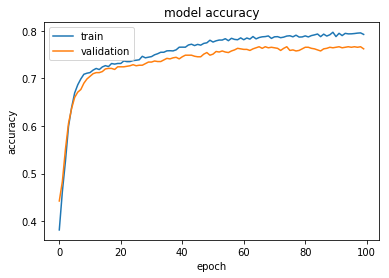

In [33]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

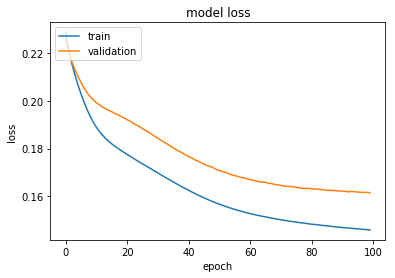

In [34]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [35]:
preds = model.predict_classes(X_test)

In [36]:
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          0       0.92      0.78      0.85       800
          1       0.46      0.73      0.56       200

avg / total       0.83      0.77      0.79      1000



In [37]:
print(confusion_matrix(y_test, preds))

[[627 173]
 [ 54 146]]


## Conclusion

Based on recall, the Neural network clearly outperforms the simpler models (73% True positives vs 42% resp 21%). Recall and not accuracy should be considered to stress the importance of finding customers with high likelihood to churn although that comes with the cost of increasing the False negatives also. In a business perspective, the cost of miss-classifying positives is probably higher than miss-classifying negatives.